In [4]:
import os
import pickle 
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime


In [71]:
sys.path.append('D:/UCL/FSPSimulator')
with open(os.path.join(os.getcwd(), '../../src/data/catalogue/SATCAT_after_prop_realistic.pickle'), 'rb') as f:
            # Load the data from the pickle file
            SATCAT_after_prop = pickle.load(f)

In [67]:
for satellite in SATCAT_after_prop:
    try: 
        satellite.altitude = np.linalg.norm(satellite.sgp4_ephemeris[0][1]) - 6378
        print(satellite.altitude)
    except:
        continue

213.79832887352768
954.7662515570837
151.68012144097793
271.9298079666505
2853.7373819138993
2172.391089265275
755.8057779224328
195.70219580763114
466.9170183929673
3198.9534434978814
556.5974329461178
468.81626694467013
205.9189764392995
242.77032930418682
623.4568891363851
198.89891346738568
211.56902232366974
181.23079801989752
590.5252220151824
172.9021782002319
204.9472140532098
189.41572746738893
553.4974998967045
288.2622758170437
330.79070318332106
421.70323505605666
298.427889672741
400.93237956526264
229.90534787892466
606.9734656287164
830.7078153881275
632.2775474966411
238.46013011749437
411.80138201239424
1566.3482176615844
1648.028519187952
816.3554449692192
1674.5248849597792
147.5902762613996
308.1699096283437
177.70480150814
310.72393671981354
1164.5036682895243
1042.9496797728598
223.24261532903074
166.98044296472926
144.52560953458305
271.16542115653647
236.8493424438766
271.65624748464234
183.09240609889912
193.35371181492246
227.42294848432266
175.89616646578543


In [72]:
total = 0
for sat in SATCAT_after_prop:
    try:
        val = float(sat.mass)
        if val > 0:
            total += val
    except:
        continue

print(total)

61552853.92300162


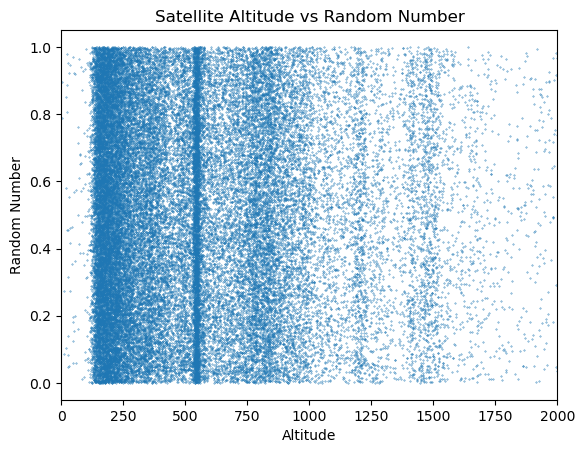

In [15]:
altitudes = [satellite.altitude for satellite in SATCAT_after_prop]
plt.scatter(altitudes, y_values, s=0.1)

# Add labels and title to the plot
plt.xlabel('Altitude')
plt.ylabel('Random Number')
plt.xlim(0, 2000)
plt.title('Satellite Altitude vs Random Number')

# Display the plot
plt.show()

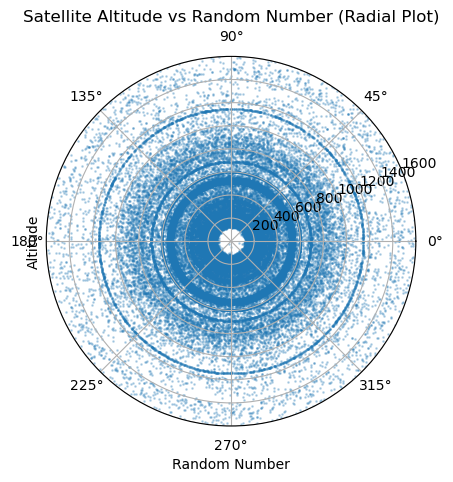

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Sample data
y_values = [random.random() for _ in SATCAT_after_prop]
altitudes = [satellite.altitude for satellite in SATCAT_after_prop]

# Convert altitude and y values to polar coordinates
r = altitudes
theta = 2 * np.pi * np.array(y_values)

# Create a polar scatter plot
ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r, s=1, alpha=0.25)

# Set the radial axis limit
ax.set_rlim(0, 1600)

# Add labels and title to the plot
ax.set_xlabel('Random Number')
ax.set_ylabel('Altitude')
ax.set_title('Satellite Altitude vs Random Number (Radial Plot)')

# Display the plot
plt.show()


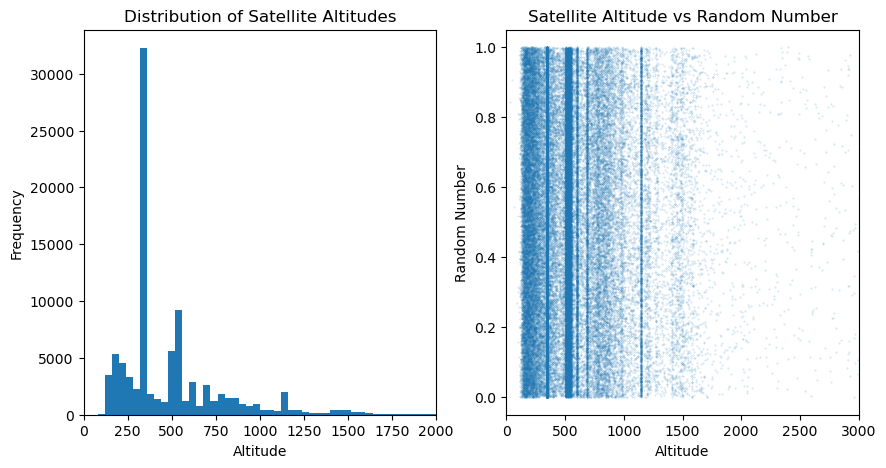

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
y_values = [random.random() for _ in SATCAT_after_prop]

altitudes = [satellite.altitude for satellite in SATCAT_after_prop]
# Create a histogram of the altitudes
ax1.hist(altitudes, bins=50, range=(0, 2000))

# Add labels and title to the plot
ax1.set_xlabel('Altitude')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 2000)
ax1.set_title('Distribution of Satellite Altitudes')

# Plot the second chart on the second subplot
ax2.scatter(altitudes, y_values, s=0.1, alpha=0.3)

# Add labels and title to the plot
ax2.set_xlabel('Altitude')
ax2.set_ylabel('Random Number')
ax2.set_xlim(0, 3000)
ax2.set_title('Satellite Altitude vs Random Number')

# Display the plot
plt.show()

In [10]:
altitudes

[213.79832887352768,
 954.7662515570837,
 151.68012144097793,
 271.9298079666505,
 2853.7373819138993,
 2172.391089265275,
 21263.2285,
 755.8057779224328,
 20206.352,
 195.70219580763114,
 466.9170183929673,
 3198.9534434978814,
 556.5974329461178,
 237.0975,
 468.81626694467013,
 205.9189764392995,
 242.77032930418682,
 165.504,
 623.4568891363851,
 198.89891346738568,
 211.56902232366974,
 181.23079801989752,
 590.5252220151824,
 172.9021782002319,
 204.9472140532098,
 189.41572746738893,
 553.4974998967045,
 288.2622758170437,
 330.79070318332106,
 421.70323505605666,
 298.427889672741,
 400.93237956526264,
 166.3385,
 229.90534787892466,
 606.9734656287164,
 830.7078153881275,
 632.2775474966411,
 238.46013011749437,
 411.80138201239424,
 1566.3482176615844,
 1648.028519187952,
 816.3554449692192,
 1674.5248849597792,
 147.5902762613996,
 308.1699096283437,
 177.70480150814,
 310.72393671981354,
 1164.5036682895243,
 1042.9496797728598,
 167.3505,
 223.24261532903074,
 162.6465,
 

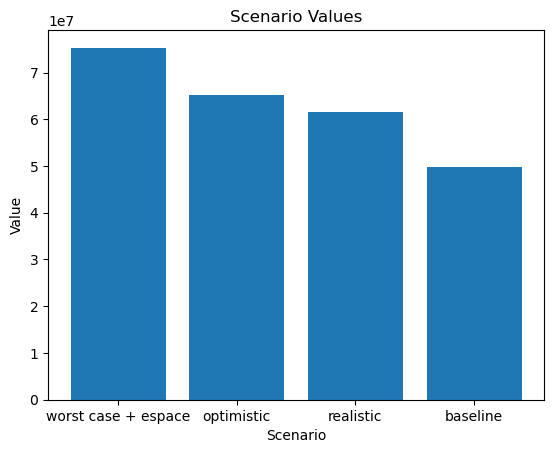

In [75]:
data = {"worst case + espace": 75305977.92300162, "optimistic": 65264154.92300162, "realistic": 61552853.92300162, "baseline": 49889197.92300162}

# Create a bar chart
plt.bar(data.keys(), data.values())

# Add labels and title to the plot
plt.xlabel('Scenario')
plt.ylabel('Value')
plt.title('Scenario Values')

# Display the plot
plt.show()